# **codeByte:**

## Data Loading
Change the data loading method change the paths to run this(I've uploaded datasets)

In [ ]:
# Import necessary libraries
import pandas as pd
from google.colab import files
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define file paths
og_file_path = '/content/drive/MyDrive/Datasets/og-unclean-data.csv'
spatial_file_path = '/content/drive/MyDrive/Datasets/Spatial-unclean-data.csv'
temporal_file_path = '/content/drive/MyDrive/Datasets/Temporal-unclean-data.csv'

# Download the files from Drive (if necessary)
files.download(og_file_path)
files.download(spatial_file_path)
files.download(temporal_file_path)


# Load the datasets into pandas DataFrames
try:
    if os.path.exists(og_file_path) and os.path.exists(spatial_file_path) and os.path.exists(temporal_file_path):
        og_data = pd.read_csv(og_file_path)
        spatial_data = pd.read_csv(spatial_file_path)
        temporal_data = pd.read_csv(temporal_file_path)
    else:
        raise FileNotFoundError("One or more files are missing.")
except FileNotFoundError as e:
    print(f"Error loading file: {e}")


MessageError: Error: credential propagation was unsuccessful

## Data Preprocessing



### Data Cleaning
1. Missing Values

In [ ]:
# Drop irrelevant columns
og_data_cleaned = og_data.drop(columns=['Unnamed: 13', 'Unnamed: 14'])
spatial_data_cleaned = spatial_data.drop(columns=['Unnamed: 3'])
temporal_data_cleaned = temporal_data.drop(columns=['Unnamed: 3', 'Unnamed: 4'])

# Handle missing values
# Forward fill for consistency
og_data_cleaned.fillna(method='ffill', inplace=True)

# Drop rows where MPA or FisheryConsumption is missing in spatial and temporal datasets
spatial_data_cleaned.dropna(subset=['MPA', 'Fishery'], inplace=True)
temporal_data_cleaned.dropna(subset=['MPA', 'FisheryConsumption'], inplace=True)

# The cleaned datasets
cleaned_og_data = og_data_cleaned
cleaned_spatial_data = spatial_data_cleaned
cleaned_temporal_data = temporal_data_cleaned

# Paths for saving cleaned data
cleaned_og_data_path = '/content/drive/MyDrive/Datasets/cleaned_og_data.csv'
cleaned_spatial_data_path = '/content/drive/MyDrive/Datasets/cleaned_spatial_data.csv'
cleaned_temporal_data_path = '/content/drive/MyDrive/Datasets/cleaned_temporal_data.csv'

# Save the cleaned data
try:
    cleaned_og_data.to_csv(cleaned_og_data_path, index=False)
    cleaned_spatial_data.to_csv(cleaned_spatial_data_path, index=False)
    cleaned_temporal_data.to_csv(cleaned_temporal_data_path, index=False)
    print("Cleaned data saved successfully.")
except Exception as e:
    print(f"Error saving cleaned data: {e}")

# Output cleaned data to confirm the result
cleaned_og_data.head(), cleaned_spatial_data.head(), cleaned_temporal_data.head()

2. Encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define file paths
og_file_path = '/content/drive/MyDrive/Datasets/cleaned_og_data.csv'
spatial_file_path = '/content/drive/MyDrive/Datasets/cleaned_spatial_data.csv'
temporal_file_path = '/content/drive/MyDrive/Datasets/cleaned_temporal_data.csv'

# Load the datasets into pandas DataFrames
og_data_cleaned = pd.read_csv(og_file_path)
spatial_data_cleaned = pd.read_csv(spatial_file_path)
temporal_data_cleaned = pd.read_csv(temporal_file_path)

categorical_columns = ['Country Name']

# Encoding categorical columns in og_data_cleaned
for col in categorical_columns:
    og_data_cleaned[col] = label_encoder.fit_transform(og_data_cleaned[col])

# Encoding categorical columns in spatial_data_cleaned
for col in categorical_columns:
    spatial_data_cleaned[col] = label_encoder.fit_transform(spatial_data_cleaned[col])


# The cleaned and encoded datasets
cleaned_og_data = og_data_cleaned
cleaned_spatial_data = spatial_data_cleaned
cleaned_temporal_data = temporal_data_cleaned

# Paths for saving cleaned data
cleaned_og_data_path = '/content/drive/MyDrive/Datasets/cleaned_encoded_og_data.csv'
cleaned_spatial_data_path = '/content/drive/MyDrive/Datasets/cleaned_encoded_spatial_data.csv'
cleaned_temporal_data_path = '/content/drive/MyDrive/Datasets/cleaned_encoded_temporal_data.csv'

# Save the cleaned and encoded data
cleaned_og_data.to_csv(cleaned_og_data_path, index=False)
cleaned_spatial_data.to_csv(cleaned_spatial_data_path, index=False)
cleaned_temporal_data.to_csv(cleaned_temporal_data_path, index=False)

# Output cleaned and encoded data to confirm the result
cleaned_og_data.head(), cleaned_spatial_data.head(), cleaned_temporal_data.head()

3. Standardization and Normalization

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
# Mount Google Drive
drive.mount('/content/drive')

# Define file paths
og_file_path = '/content/drive/MyDrive/Datasets/cleaned_encoded_og_data.csv'
spatial_file_path = '/content/drive/MyDrive/Datasets/cleaned_encoded_spatial_data.csv'
temporal_file_path = '/content/drive/MyDrive/Datasets/cleaned_encoded_temporal_data.csv'

# Load the datasets into pandas DataFrames
og_data = pd.read_csv(og_file_path)
spatial_data = pd.read_csv(spatial_file_path)
temporal_data = pd.read_csv(temporal_file_path)

datasets = {
    'og_data': og_data,
    'spatial_data': spatial_data,
    'temporal_data': temporal_data
}

for name, data in datasets.items(): # Iterate using name and data
  # One-Hot Encoding for categorical columns
  categorical_columns = ['Country Name']
  if 'Country Name' in data.columns: # Check if column exists before encoding
    encoder = OneHotEncoder(sparse=False)
    encoded_categories = encoder.fit_transform(data[categorical_columns])

    # Create a DataFrame with the encoded categorical columns
    encoded_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(categorical_columns))

    # Drop the original categorical columns and concatenate the encoded columns
    data = data.drop(categorical_columns, axis=1)
    data = pd.concat([data, encoded_df], axis=1)

  # Normalization
  scaler = MinMaxScaler()
  normalized_data = scaler.fit_transform(data)

  # Standardization
  standardizer = StandardScaler()
  standardized_data = standardizer.fit_transform(data)

  # Convert the numpy arrays back to DataFrames
  normalized_df = pd.DataFrame(normalized_data, columns=data.columns)
  standardized_df = pd.DataFrame(standardized_data, columns=data.columns)

  # Save the transformed data to new CSV files, using the dataset name in the filename
  normalized_df.to_csv(f'/content/drive/MyDrive/Datasets/{name}-nrm.csv', index=False)
  standardized_df.to_csv(f'/content/drive/MyDrive/Datasets/{name}-std.csv', index=False)

  # Display the first few rows of each DataFrame
  print(f"Encoded and Normalized {name} Data:")
  print(normalized_df.head())

  print(f"\nEncoded and Standardized {name} Data:")
  print(standardized_df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Encoded and Normalized og_data Data:
           2017          2018          2019          2020          2021  \
0  4.465208e-07  4.116628e-07  4.329412e-07  8.553970e-08  1.650334e-07   
1  1.901961e-02  1.837668e-02  1.808274e-02  1.795210e-02  1.888238e-02   
2  4.363704e-05  4.701946e-05  5.041991e-05  5.331784e-05  5.888069e-05   
3  1.808779e-02  1.723344e-02  1.735339e-02  1.662208e-02  1.705864e-02   
4  2.600342e-03  2.104662e-03  1.900319e-03  1.775770e-03  2.448961e-03   

           2022    2017.1    2018.1    2019.1    2020.1  ...  \
0  3.979066e-08  0.000001  0.000001  0.000001  0.000001  ...   
1  1.743846e-02  0.049457  0.049540  0.052359  0.050366  ...   
2  6.078609e-05  0.049457  0.049540  0.052359  0.050366  ...   
3  1.823110e-02  0.049457  0.049540  0.052359  0.050366  ...   
4  2.207244e-03  0.000049  0.000049  0.000049  0.000049  ...   

   Country Name_256  Country Name_257  Country Name_258  Country Name_259  \
0               0.0               0.0             

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Loading all the output dataset paths

In [ ]:
# Original unclean data
og_file_path = '/content/drive/MyDrive/Datasets/og-unclean-data.csv'
spatial_file_path = '/content/drive/MyDrive/Datasets/Spatial-unclean-data.csv'
temporal_file_path = '/content/drive/MyDrive/Datasets/Temporal-unclean-data.csv'

# Cleaned data
cleaned_og_data_path = '/content/drive/MyDrive/Datasets/cleaned_og_data.csv'
cleaned_spatial_data_path = '/content/drive/MyDrive/Datasets/cleaned_spatial_data.csv'
cleaned_temporal_data_path = '/content/drive/MyDrive/Datasets/cleaned_temporal_data.csv'

# Cleaned and encoded data
cleaned_encoded_og_data_path = '/content/drive/MyDrive/Datasets/cleaned_encoded_og_data.csv'
cleaned_encoded_spatial_data_path = '/content/drive/MyDrive/Datasets/cleaned_encoded_spatial_data.csv'
cleaned_encoded_temporal_data_path = '/content/drive/MyDrive/Datasets/cleaned_encoded_temporal_data.csv'

# Normalized and standardized data
og_data_nrm_path = 'og_data-nrm.csv'
og_data_std_path = 'og_data-std.csv'
spatial_data_nrm_path = 'spatial_data-nrm.csv'
spatial_data_std_path = 'spatial_data-std.csv'
temporal_data_nrm_path = 'temporal_data-nrm.csv'
temporal_data_std_path = 'temporal_data-std.csv'



## Descriptive Analysis


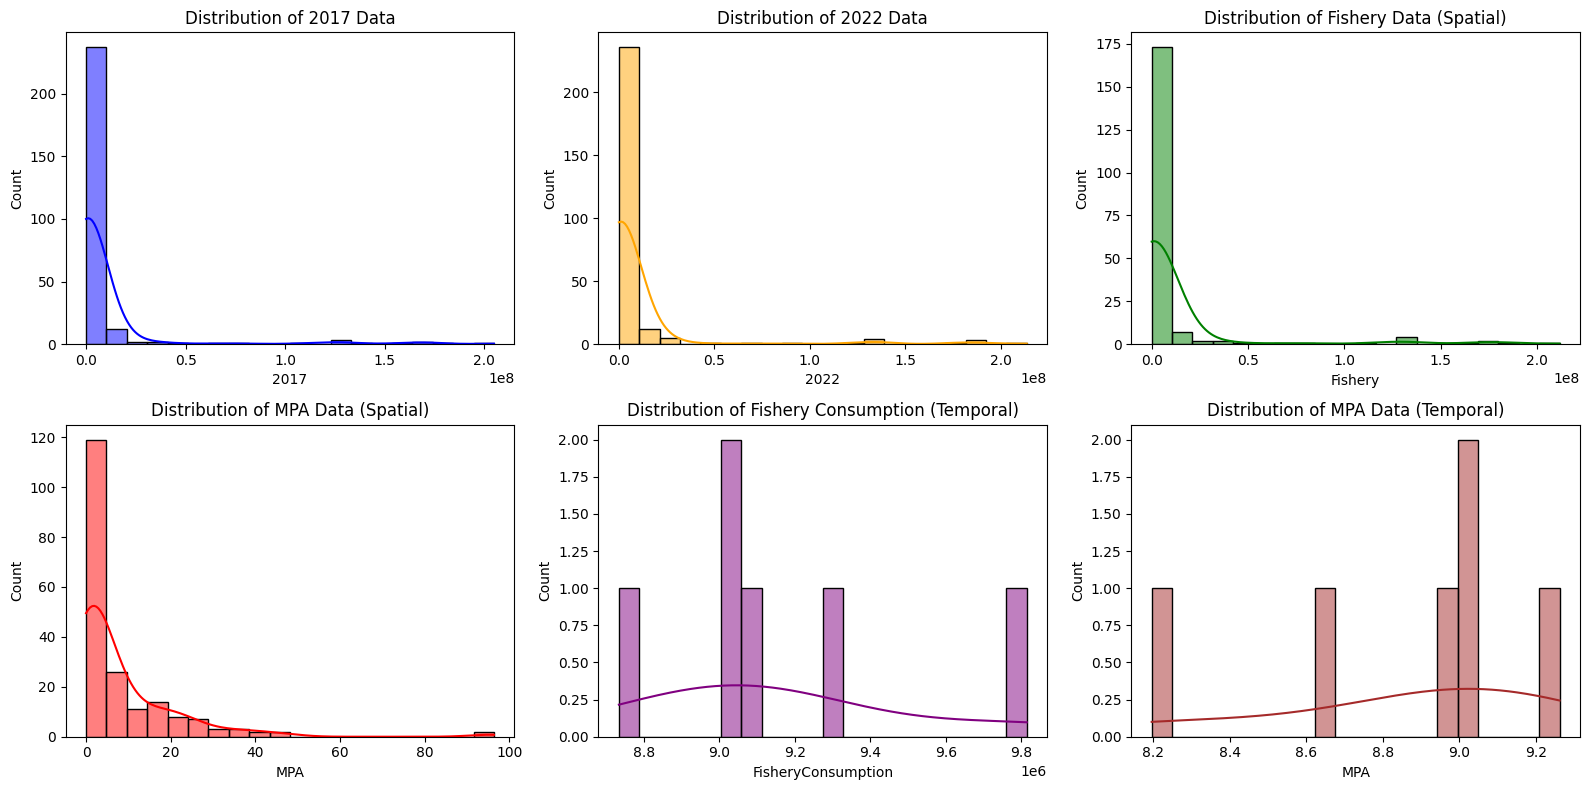

(       Country Name          2017          2018          2019          2020  \
 count    266.000000  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02   
 mean     132.500000  8.177468e+06  8.445523e+06  8.461595e+06  8.497123e+06   
 std       76.931788  2.957357e+07  3.047498e+07  3.061605e+07  3.084114e+07   
 min        0.000000  5.800000e+01  6.300000e+01  7.300000e+01  1.433700e+02   
 25%       66.250000  1.840289e+04  1.706722e+04  1.737274e+04  1.759810e+04   
 50%      132.500000  1.227746e+05  1.341336e+05  1.323479e+05  1.354821e+05   
 75%      198.750000  1.684218e+06  1.738210e+06  1.775223e+06  1.696403e+06   
 max      265.000000  2.049177e+08  2.113381e+08  2.113452e+08  2.119485e+08   
 
                2021          2022      2017.1      2018.1      2019.1  \
 count  2.660000e+02  2.660000e+02  266.000000  266.000000  266.000000   
 mean   8.704376e+06  8.734718e+06    9.187747    8.791554    9.547062   
 std    3.152794e+07  3.177244e+07   17.367768   16.4315

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

og_data = pd.read_csv(cleaned_og_data_path)
spatial_data = pd.read_csv(cleaned_spatial_data_path)
temporal_data = pd.read_csv(cleaned_temporal_data_path)

# Generate descriptive statistics
og_data_stats = og_data.describe()
spatial_data_stats = spatial_data.describe()
temporal_data_stats = temporal_data.describe()

# Visualize distributions of key features
plt.figure(figsize=(16, 8))

# Original Data (Fishery, MPA from og_data)
plt.subplot(2, 3, 1)
sns.histplot(og_data['2017'], kde=True, bins=20, color='blue')
plt.title('Distribution of 2017 Data')

plt.subplot(2, 3, 2)
sns.histplot(og_data['2022'], kde=True, bins=20, color='orange')
plt.title('Distribution of 2022 Data')

# Spatial Data
plt.subplot(2, 3, 3)
sns.histplot(spatial_data['Fishery'], kde=True, bins=20, color='green')
plt.title('Distribution of Fishery Data (Spatial)')

plt.subplot(2, 3, 4)
sns.histplot(spatial_data['MPA'], kde=True, bins=20, color='red')
plt.title('Distribution of MPA Data (Spatial)')

# Temporal Data
plt.subplot(2, 3, 5)
sns.histplot(temporal_data['FisheryConsumption'], kde=True, bins=20, color='purple')
plt.title('Distribution of Fishery Consumption (Temporal)')

plt.subplot(2, 3, 6)
sns.histplot(temporal_data['MPA'], kde=True, bins=20, color='brown')
plt.title('Distribution of MPA Data (Temporal)')

plt.tight_layout()
plt.show()

og_data_stats, spatial_data_stats, temporal_data_stats

## Exploratory Data Analysis


Temporal Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                6 non-null      int64  
 1   MPA                 6 non-null      float64
 2   FisheryConsumption  6 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 272.0 bytes
None

Spatial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  197 non-null    object 
 1   Fishery       197 non-null    float64
 2   MPA           197 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.7+ KB
None

Temporal Data Summary Statistics:
              Year       MPA  FisheryConsumption
count     6.000000  6.000000        6.000000e+00
mean   2019.500000  8.861797        9.159927e+

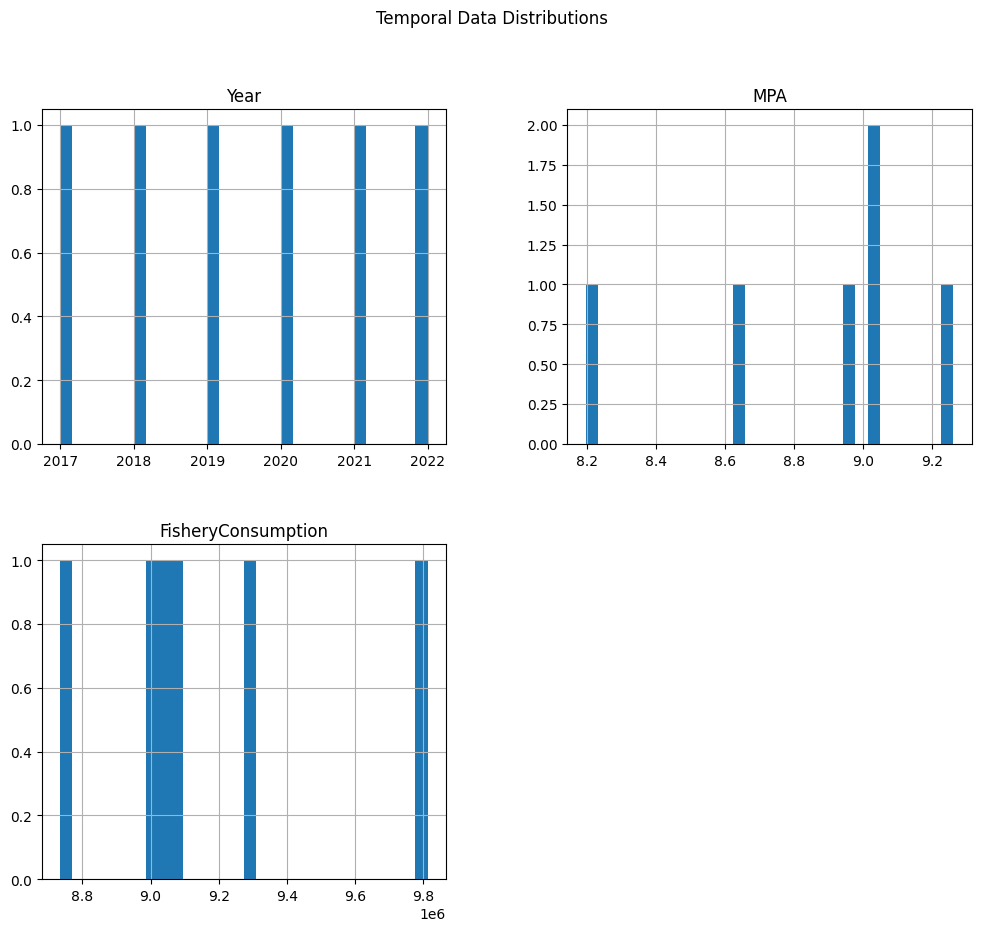

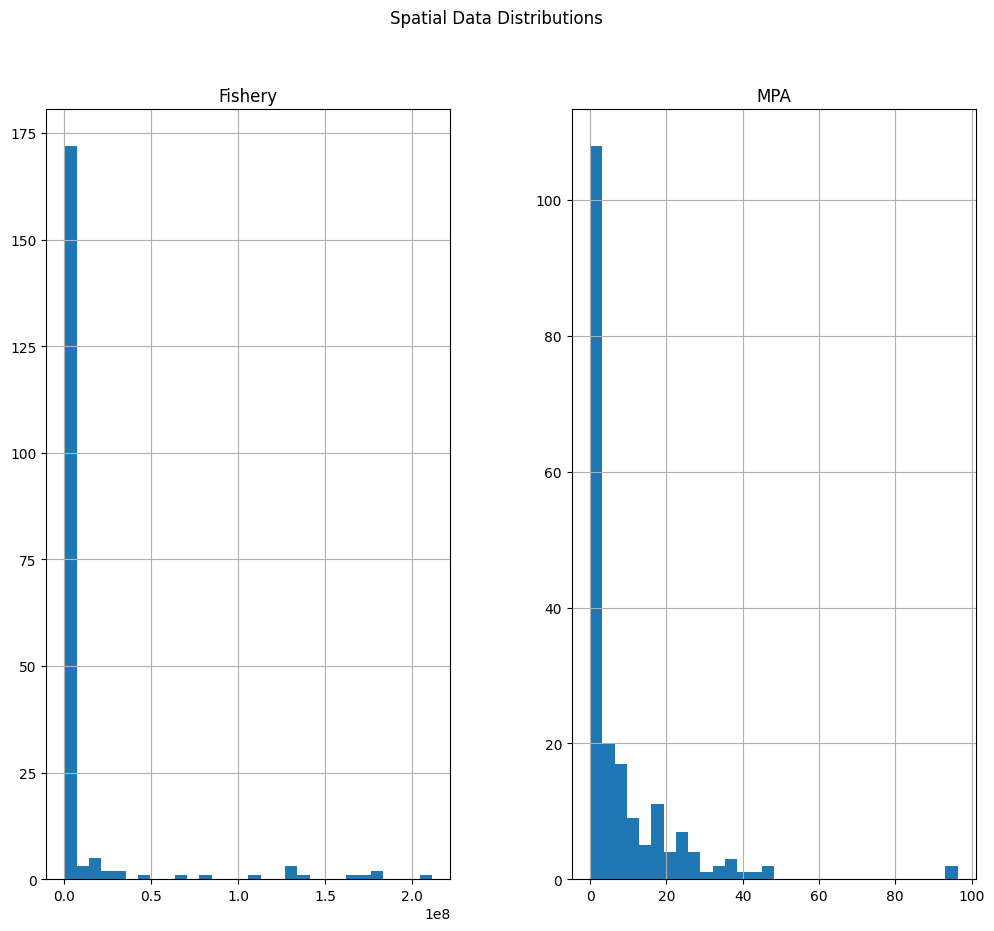


Missing Values in Temporal Data:
Year                  0
MPA                   0
FisheryConsumption    0
dtype: int64

Missing Values in Spatial Data:
Country Name    0
Fishery         0
MPA             0
dtype: int64


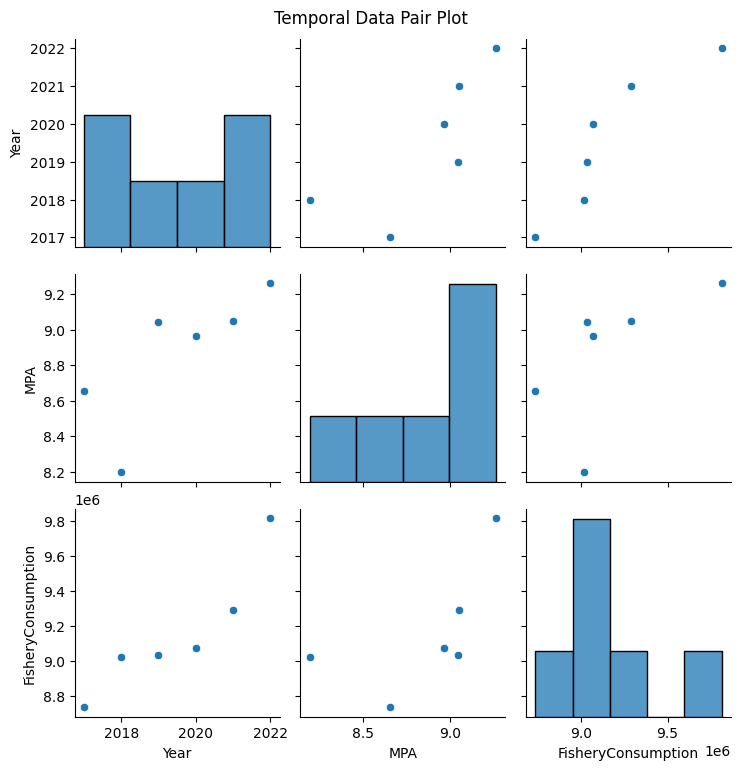

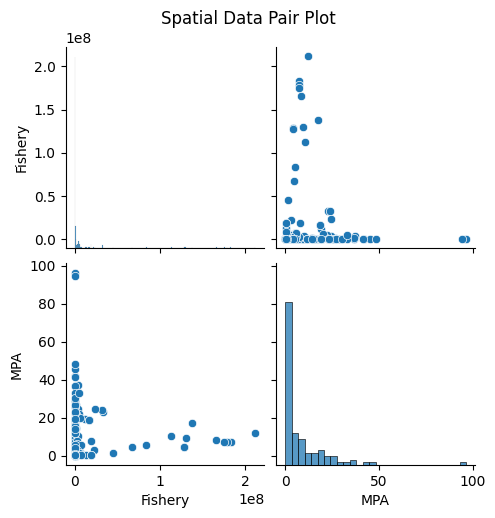

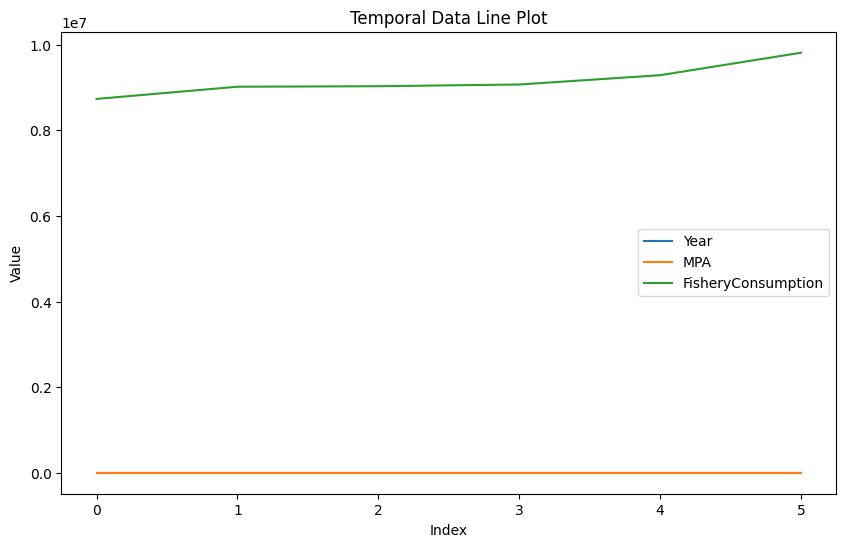

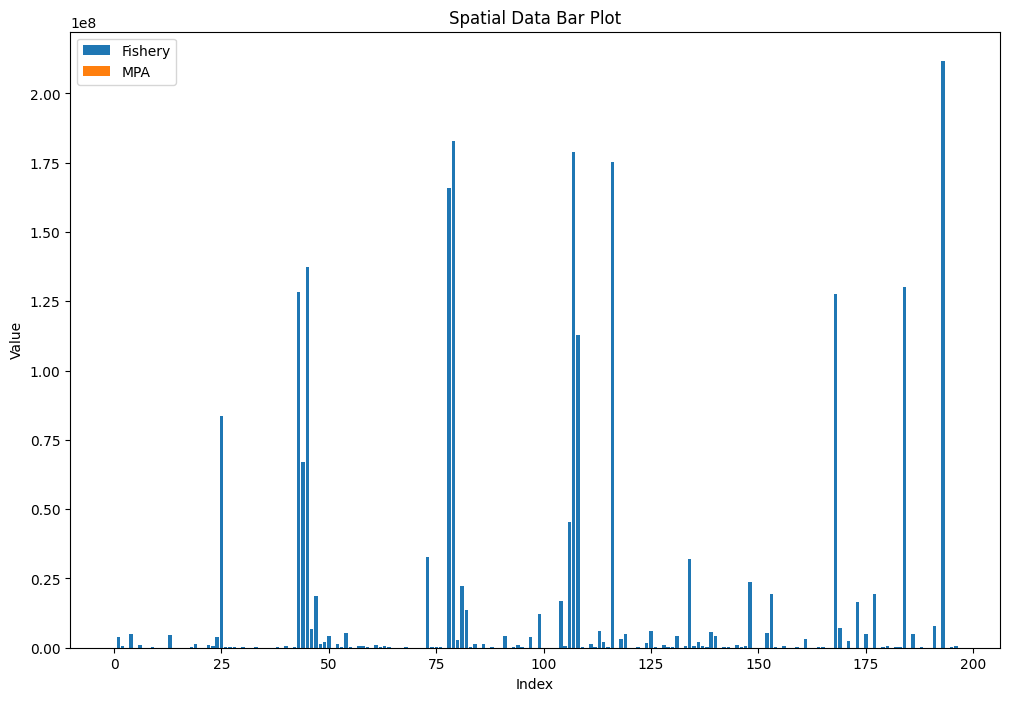

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cleaned_og_data_path = '/content/drive/MyDrive/Datasets/cleaned_og_data.csv'
cleaned_spatial_data_path = '/content/drive/MyDrive/Datasets/cleaned_spatial_data.csv'
cleaned_temporal_data_path = '/content/drive/MyDrive/Datasets/cleaned_temporal_data.csv'

# Load the datasets
temporal_df= pd.read_csv(cleaned_temporal_data_path)
spatial_df= pd.read_csv(cleaned_spatial_data_path)

# Display basic information
print("Temporal Data Info:")
print(temporal_df.info())
print("\nSpatial Data Info:")
print(spatial_df.info())

# Display summary statistics
print("\nTemporal Data Summary Statistics:")
print(temporal_df.describe())
print("\nSpatial Data Summary Statistics:")
print(spatial_df.describe())

# Display the first few rows of each dataset
print("\nFirst Few Rows of Temporal Data:")
print(temporal_df.head())
print("\nFirst Few Rows of Spatial Data:")
print(spatial_df.head())

# Plot histograms for temporal data
temporal_df.hist(figsize=(12, 10), bins=30)
plt.suptitle('Temporal Data Distributions')
plt.show()

# Plot histograms for spatial data
spatial_df.hist(figsize=(12, 10), bins=30)
plt.suptitle('Spatial Data Distributions')
plt.show()

# Check for missing values
print("\nMissing Values in Temporal Data:")
print(temporal_df.isnull().sum())
print("\nMissing Values in Spatial Data:")
print(spatial_df.isnull().sum())

# Pair plot for temporal data
sns.pairplot(temporal_df)
plt.suptitle('Temporal Data Pair Plot', y=1.02)
plt.show()

numeric_cols = spatial_df.select_dtypes(include=['float', 'int']).columns

# Pair plot for spatial data
sns.pairplot(spatial_df[numeric_cols])
plt.suptitle('Spatial Data Pair Plot', y=1.02)
plt.show()

# Line plot example for temporal data
plt.figure(figsize=(10, 6))
for column in temporal_df.columns:
    if pd.api.types.is_numeric_dtype(temporal_df[column]):
        plt.plot(temporal_df[column], label=column)
plt.title('Temporal Data Line Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# Bar plot example for spatial data
plt.figure(figsize=(12, 8))
for column in numeric_cols:
    plt.bar(spatial_df.index, spatial_df[column], label=column)
plt.title('Spatial Data Bar Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

## Correlational Analysis

- Handling Outliers


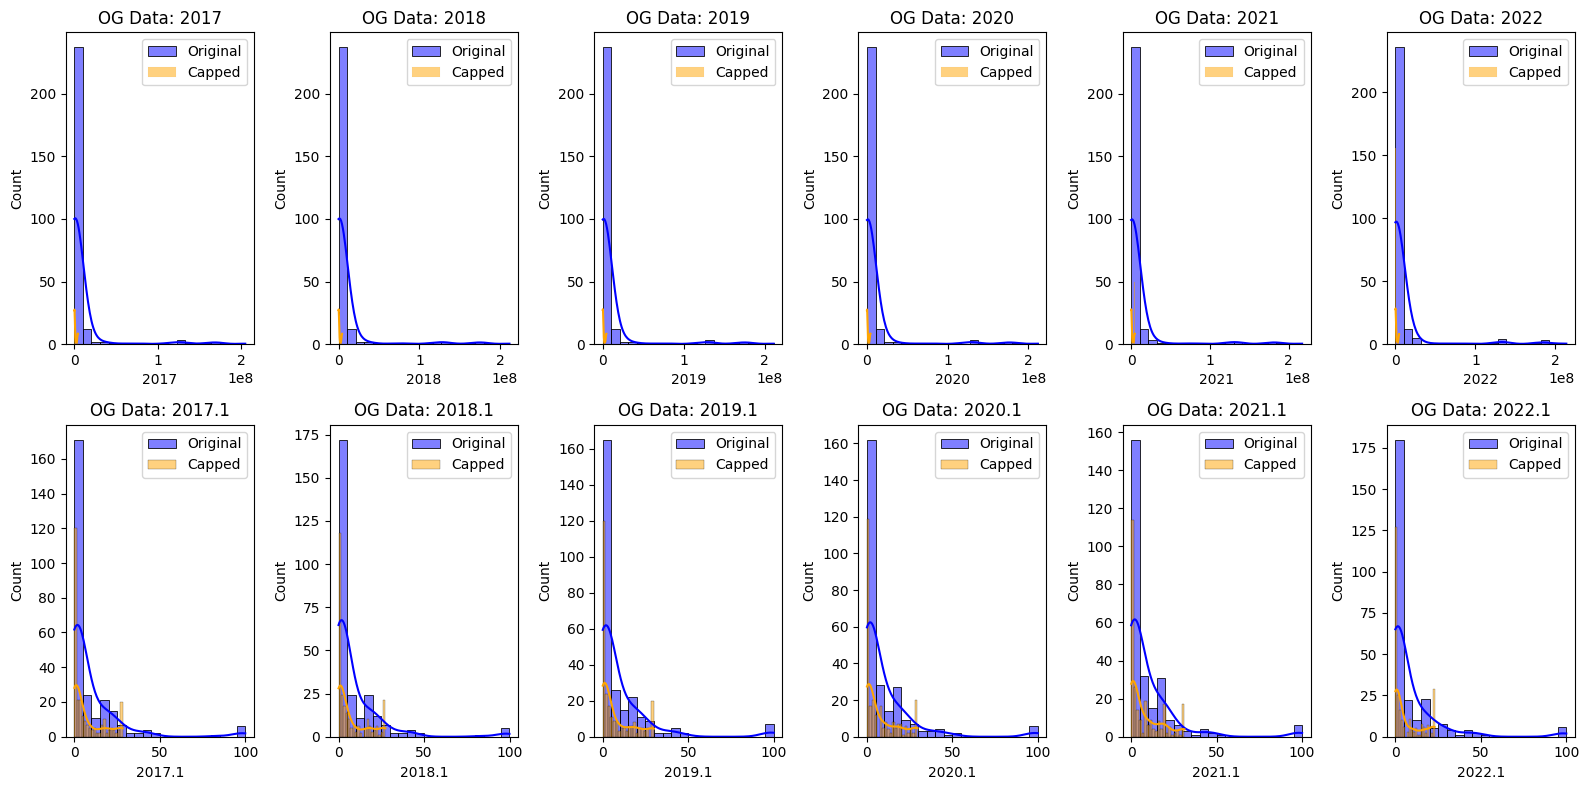

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to identify outliers using IQR
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers, lower_bound, upper_bound

# Function to cap outliers using calculated bounds
def cap_outliers(data, bounds):
    capped_data = data.copy()
    for col, (lower, upper) in bounds.items():
        capped_data[col] = np.where(data[col] < lower, lower, data[col])
        capped_data[col] = np.where(data[col] > upper, upper, capped_data[col])
    return capped_data

# Apply the function to each relevant column in the datasets
def process_outliers(df):
    outliers_info = {}
    bounds_info = {}

    for column in df.columns:
        if df[column].dtype != 'object':  # Skip non-numeric columns
            outliers, lower, upper = find_outliers_iqr(df[column])
            outliers_info[column] = outliers
            bounds_info[column] = (lower, upper)

    return outliers_info, bounds_info

# Process outliers for each dataset
outliers_ogdata, bounds_ogdata = process_outliers(og_data.iloc[:, 1:])  # Skip 'Country Name'
outliers_spatial, bounds_spatial = process_outliers(spatial_data.iloc[:, 1:])  # Skip 'Country Name'
outliers_temporal, bounds_temporal = process_outliers(temporal_data.iloc[:, 1:])  # Skip 'Year'

# Cap the outliers in each dataset
og_data_capped = cap_outliers(og_data.iloc[:, 1:], bounds_ogdata)
spatial_data_capped = cap_outliers(spatial_data.iloc[:, 1:], bounds_spatial)
temporal_data_capped = cap_outliers(temporal_data.iloc[:, 1:], bounds_temporal)

# Visualize the distributions before and after capping
def plot_distributions(df, capped_df, title_prefix):
    plt.figure(figsize=(16, 8))

    for i, column in enumerate(df.columns):
        plt.subplot(2, len(df.columns) // 2, i + 1)
        sns.histplot(df[column], kde=True, bins=20, color='blue', label='Original', alpha=0.5)
        sns.histplot(capped_df[column], kde=True, bins=20, color='orange', label='Capped', alpha=0.5)
        plt.title(f'{title_prefix}: {column}')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Plot distributions for each dataset
plot_distributions(og_data.iloc[:, 1:], og_data_capped, 'OG Data')
plot_distributions(spatial_data.iloc[:, 1:], spatial_data_capped, 'Spatial Data')
plot_distributions(temporal_data.iloc[:, 1:], temporal_data_capped, 'Temporal Data')

# Calculate percentage of outliers in each column
outlier_percentage_ogdata = {col: outliers_ogdata[col].mean() * 100 for col in outliers_ogdata}
outlier_percentage_spatial = {col: outliers_spatial[col].mean() * 100 for col in outliers_spatial}
outlier_percentage_temporal = {col: outliers_temporal[col].mean() * 100 for col in outliers_temporal}

# Output the percentages of outliers detected
outlier_percentage_ogdata, outlier_percentage_spatial, outlier_percentage_temporal

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Function to calculate and plot correlation matrix
def plot_correlation_matrix(df, title):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))

    # Create a custom colormap
    colors = ['#86c7ed','#2B659B' ,'#023360']
    cmap = LinearSegmentedColormap.from_list('custom_gradient', colors, N=256)

    heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt='.2f', vmin=-1, vmax=1, center=0)
    cbar = heatmap.collections[0].colorbar
    cbar.set_ticks([-1, 0, 1])
    cbar.set_ticklabels(['Low', 'Medium', 'High'])
    plt.title(f'Correlation Matrix for {title}')

    # Save the plot with a short and descriptive filename
    plt.savefig(f'correlation_matrix_{title.replace(" ", "_").lower()}.png')

    plt.show()
    print(correlation_matrix)

# Assuming og_data_capped, spatial_data_capped, and temporal_data_capped are already defined
plot_correlation_matrix(og_data_capped.iloc[:, 1:], 'OG Data')
plot_correlation_matrix(spatial_data_capped, 'Spatial Data')
plot_correlation_matrix(temporal_data_capped.iloc[1:, :], 'Temporal Data')


## Predictive Modeling


In [ ]:
import pandas as pd
from google.colab import files
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

cleaned_og_data_path = '/content/drive/MyDrive/Datasets/cleaned_og_data.csv'
cleaned_spatial_data_path = '/content/drive/MyDrive/Datasets/cleaned_spatial_data.csv'
cleaned_temporal_data_path = '/content/drive/MyDrive/Datasets/cleaned_temporal_data.csv'

df = pd.read_csv(cleaned_temporal_data_path)
df.head()
x=df.iloc[:,[0,1]].values
y=df.iloc[:,2].values

Mounted at /content/drive


Importing models from scikit-learn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


1. Linear Regression:

Linear Regression - MSE: 16802972596.767115, R^2: 0.8494714866198155


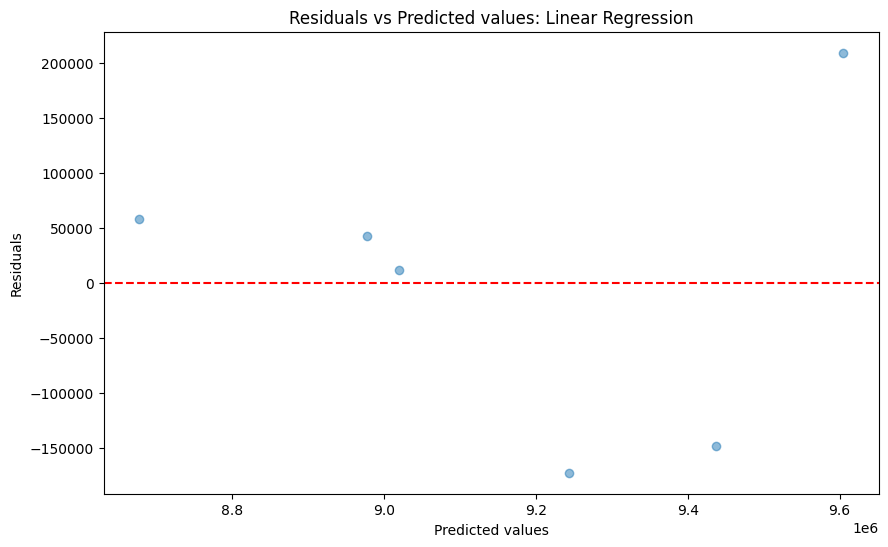

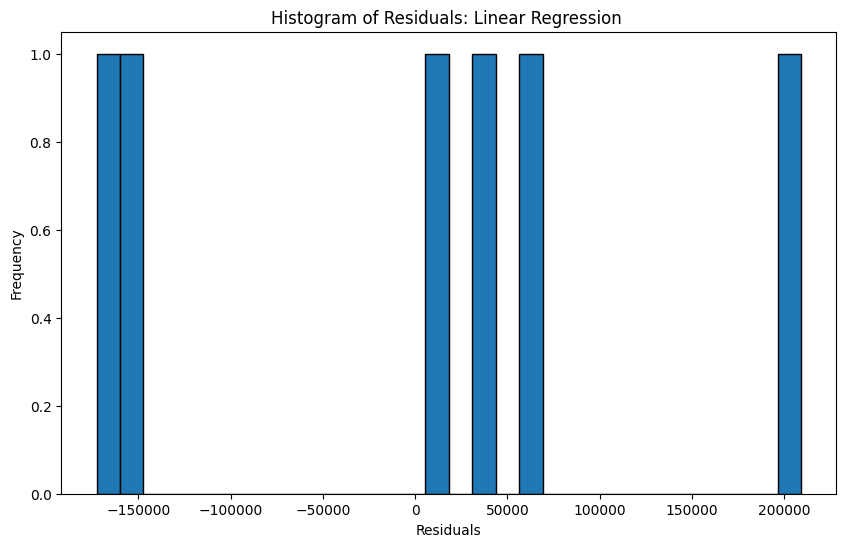

In [ ]:
# Initialize and fit the model
model = LinearRegression()
model.fit(x, y)

# Predict and evaluate
y_pred = model.predict(x)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Linear Regression - MSE: {mse}, R^2: {r2}")

# Predict using the model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Calculate residuals
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values: Linear Regression')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals: Linear Regression ')
plt.show()

2. Ridge Regression

Ridge Regression - MSE: 18555397167.201897, R^2: 0.8337724867030264


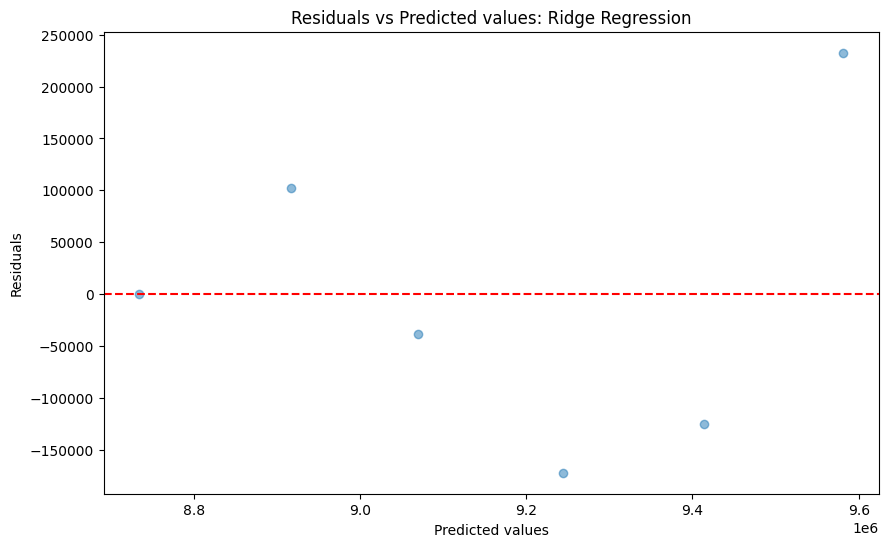

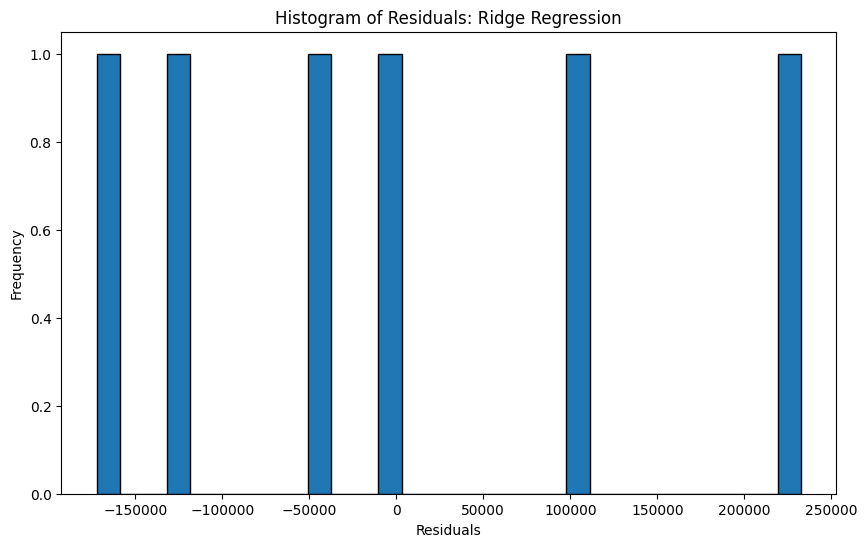

In [ ]:
# Initialize and fit the model
model = Ridge(alpha=1.0)  # Adjust alpha as needed
model.fit(x, y)

# Predict and evaluate
y_pred = model.predict(x)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Ridge Regression - MSE: {mse}, R^2: {r2}")

# Predict using the model
model = Ridge(alpha=1.0)  # Adjust alpha as needed
model.fit(x, y)
y_pred = model.predict(x)

# Calculate residuals
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values: Ridge Regression')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals: Ridge Regression')
plt.show()

3. Lasso Regression

Lasso Regression - MSE: 16802972597.052603, R^2: 0.849471486617258


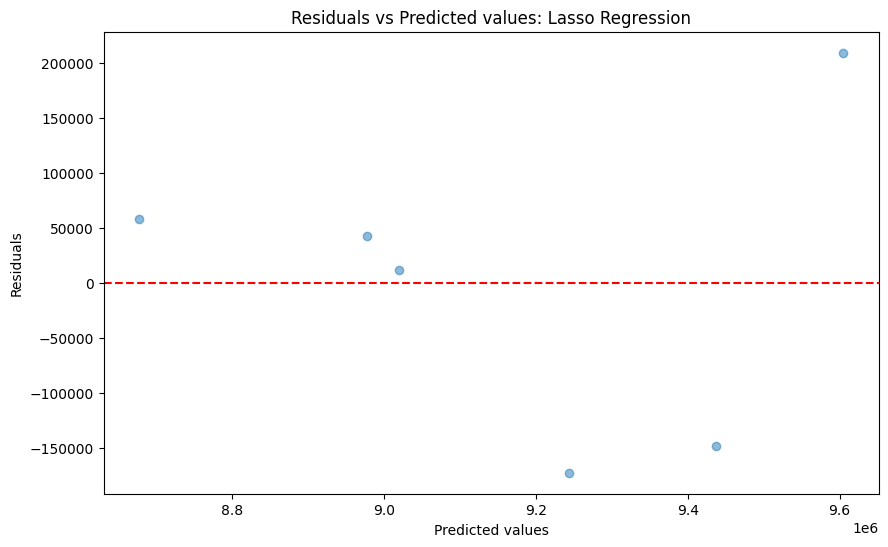

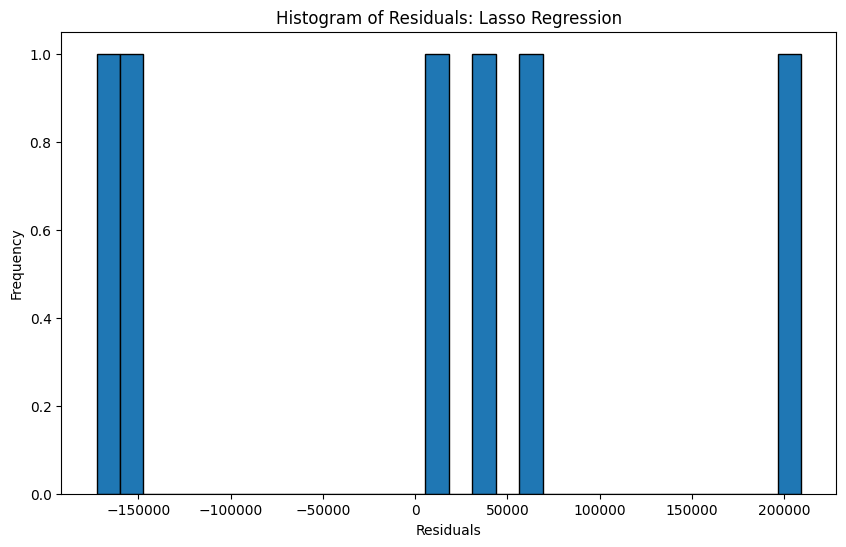

In [ ]:
# Initialize and fit the model
model = Lasso(alpha=0.1)
model.fit(x, y)

# Predict and evaluate
y_pred = model.predict(x)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Lasso Regression - MSE: {mse}, R^2: {r2}")

# Predict using the model
model = Lasso(alpha=1.0)
model.fit(x, y)
y_pred = model.predict(x)

# Calculate residuals
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values: Lasso Regression')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals: Lasso Regression')
plt.show()

4. Decision Tree

In [ ]:
# Initialize and fit the model
model = DecisionTreeRegressor()
model.fit(x, y)

# Predict and evaluate
y_pred = model.predict(x)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Decision Tree - MSE: {mse}, R^2: {r2}")

# Predict using the model
y_pred = model.predict(x)

# Calculate residuals
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values: Decision Tree')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals: Decision Tree')
plt.show()

5. Random Forest

Random Forest - MSE: 12110634877.642336, R^2: 0.8915075381023678


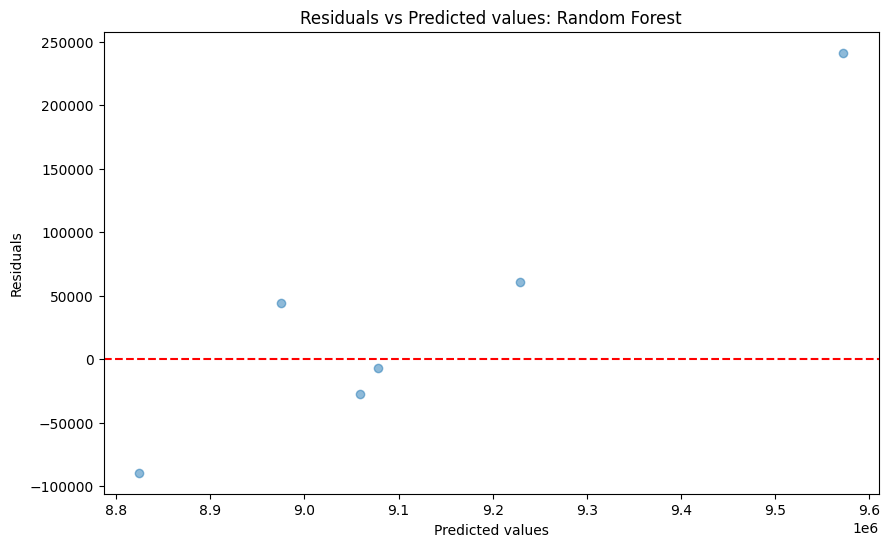

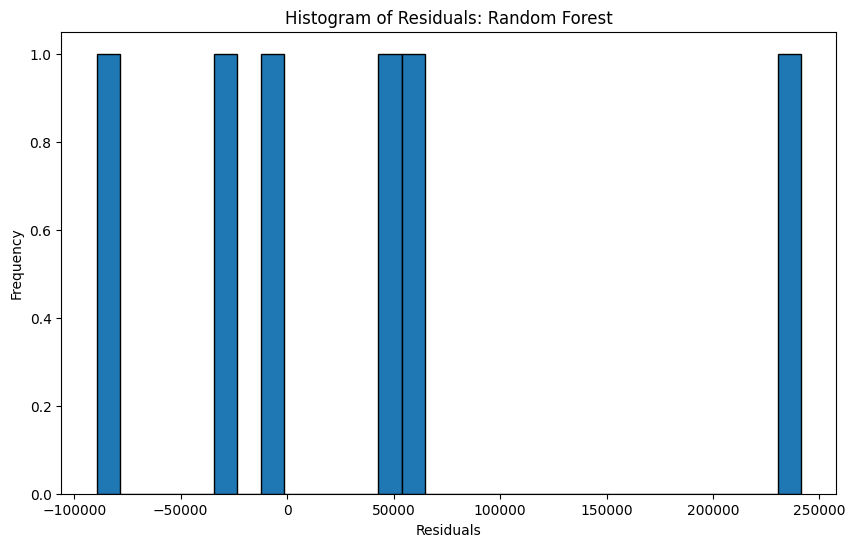

In [ ]:
# Initialize and fit the model
model = RandomForestRegressor(n_estimators=100)  # Adjust n_estimators as needed
model.fit(x, y)

# Predict and evaluate
y_pred = model.predict(x)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Random Forest - MSE: {mse}, R^2: {r2}")

# Predict using the model
y_pred = model.predict(x)

# Calculate residuals
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values: Random Forest')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals: Random Forest')
plt.show()






6. SVM

In [ ]:
# Initialize and fit the model
model = SVR(kernel='rbf')  # Adjust kernel and parameters as needed
model.fit(x, y)

# Predict and evaluate
y_pred = model.predict(x)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Support Vector Machines - MSE: {mse}, R^2: {r2}")

# Predict using the model
y_pred = model.predict(x)

# Calculate residuals
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values: Support Vector Machines')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals: Support Vector Machines')
plt.show()

6. KNN

k-Nearest Neighbors - MSE: 73801842659.17, R^2: 0.33885021854165487


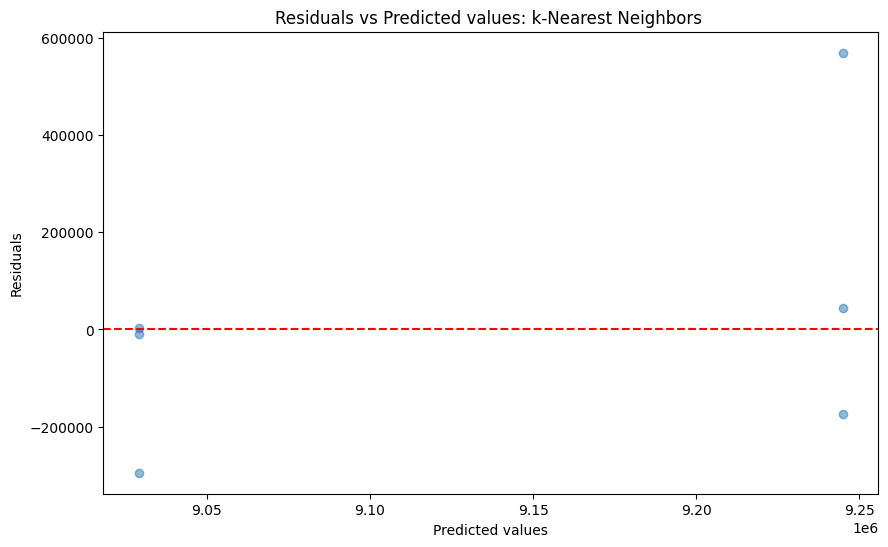

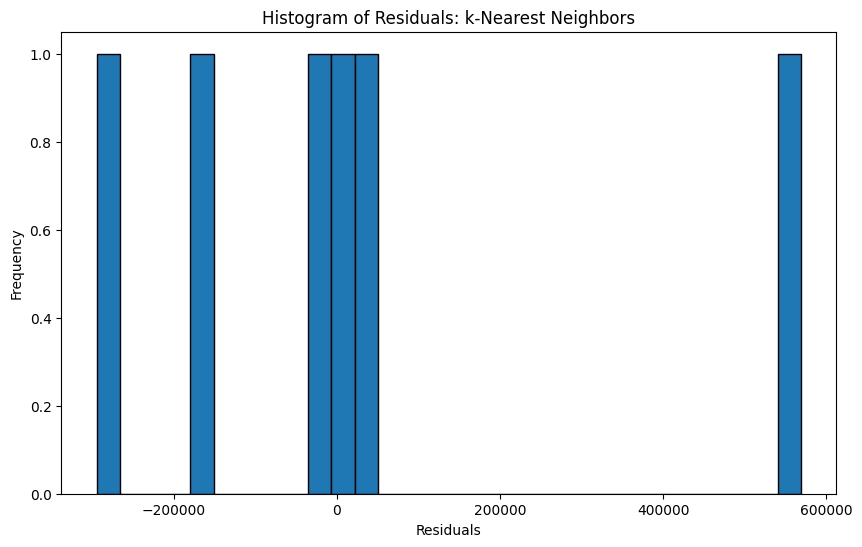

In [ ]:
# Initialize and fit the model
model = KNeighborsRegressor(n_neighbors=5)  # Adjust n_neighbors as needed
model.fit(x, y)

# Predict and evaluate
y_pred = model.predict(x)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"k-Nearest Neighbors - MSE: {mse}, R^2: {r2}")

# Predict using the model
y_pred = model.predict(x)

# Calculate residuals
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values: k-Nearest Neighbors ')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals: k-Nearest Neighbors')
plt.show()

7. Gradient Boosting

Gradient Boosting - MSE: 88.91215999527672, R^2: 0.9999999992034853


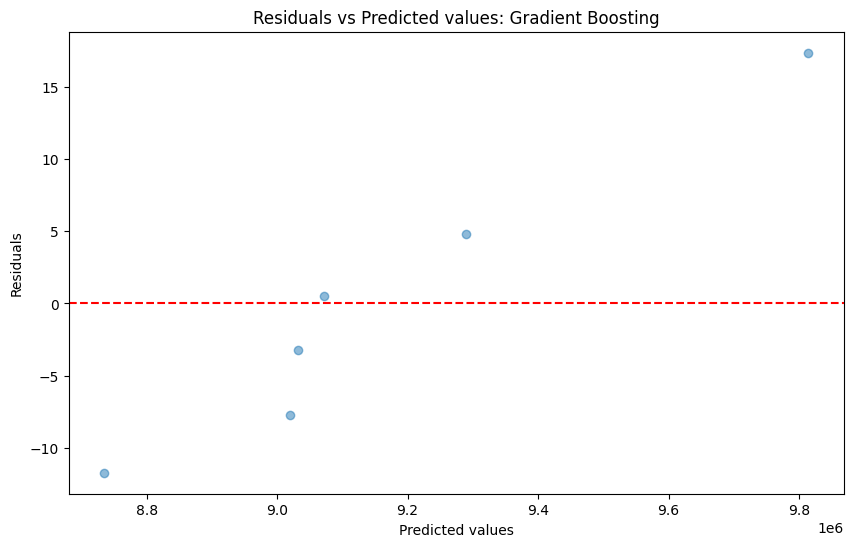

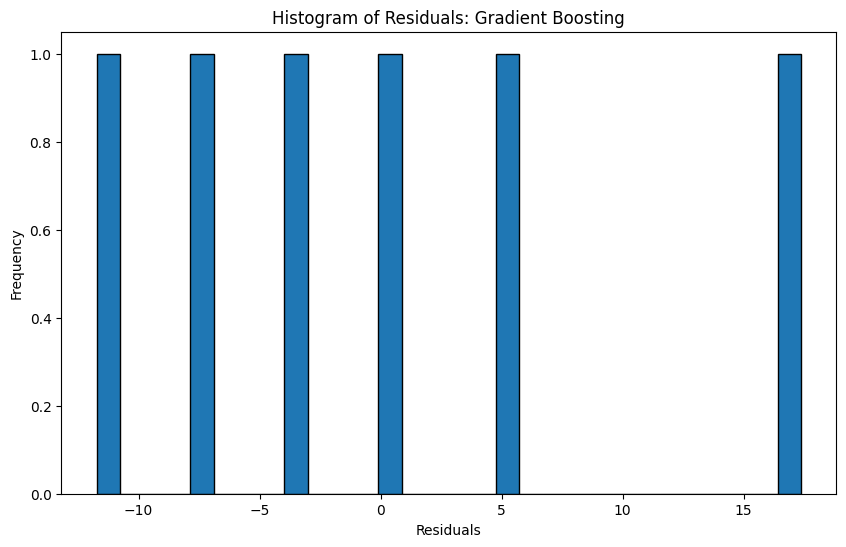

In [ ]:
# Initialize and fit the model
model = GradientBoostingRegressor(n_estimators=100)  # Adjust n_estimators as needed
model.fit(x, y)

# Predict and evaluate
y_pred = model.predict(x)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Gradient Boosting - MSE: {mse}, R^2: {r2}")

# Predict using the model
y_pred = model.predict(x)

# Calculate residuals
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values: Gradient Boosting')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals: Gradient Boosting')
plt.show()



8. Bayesian Ridge

Bayesian Regression - MSE: 111626509921.4524, R^2: 2.661714182394803e-10


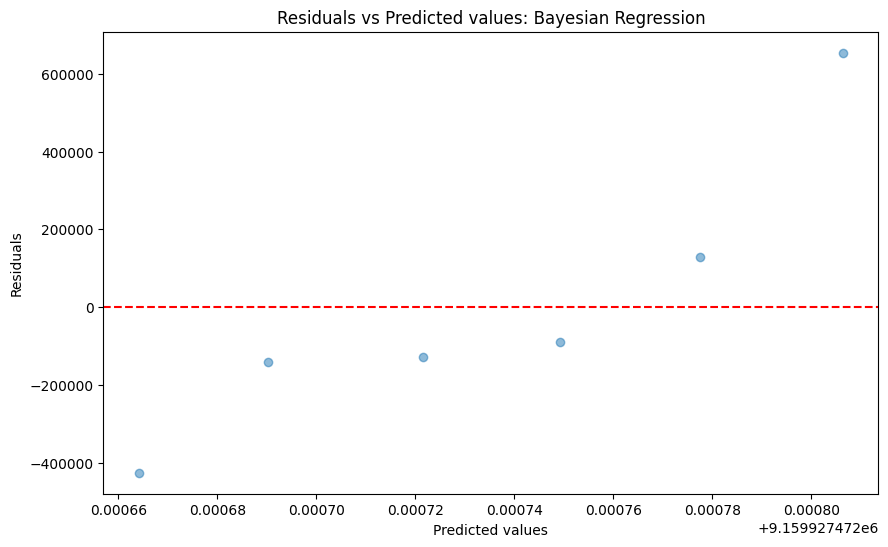

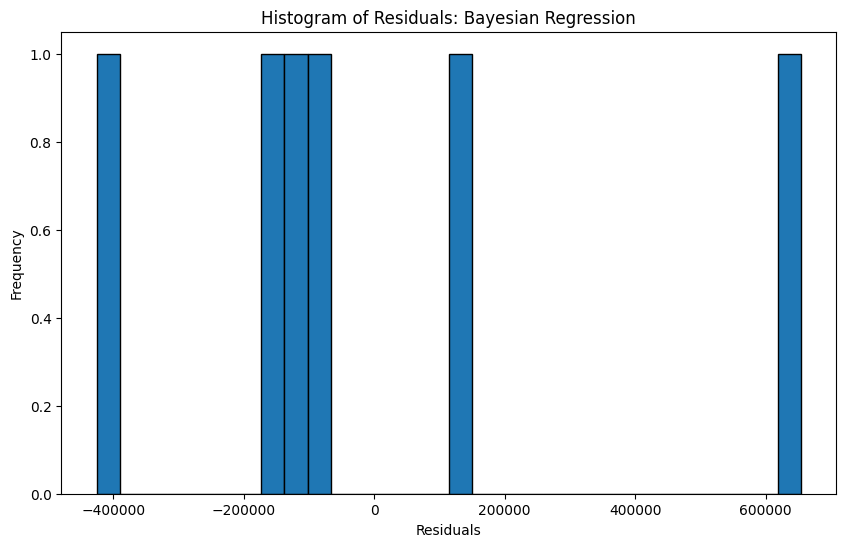

In [ ]:
# Initialize and fit the model
model = BayesianRidge()
model.fit(x, y)

# Predict and evaluate
y_pred = model.predict(x)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Bayesian Regression - MSE: {mse}, R^2: {r2}")

# Predict using the model
y_pred = model.predict(x)

# Calculate residuals
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values: Bayesian Regression')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals: Bayesian Regression')
plt.show()

## Model Comparison

<ipython-input-17-ba2e377718b9>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['Models'], rotation=45, ha='right')


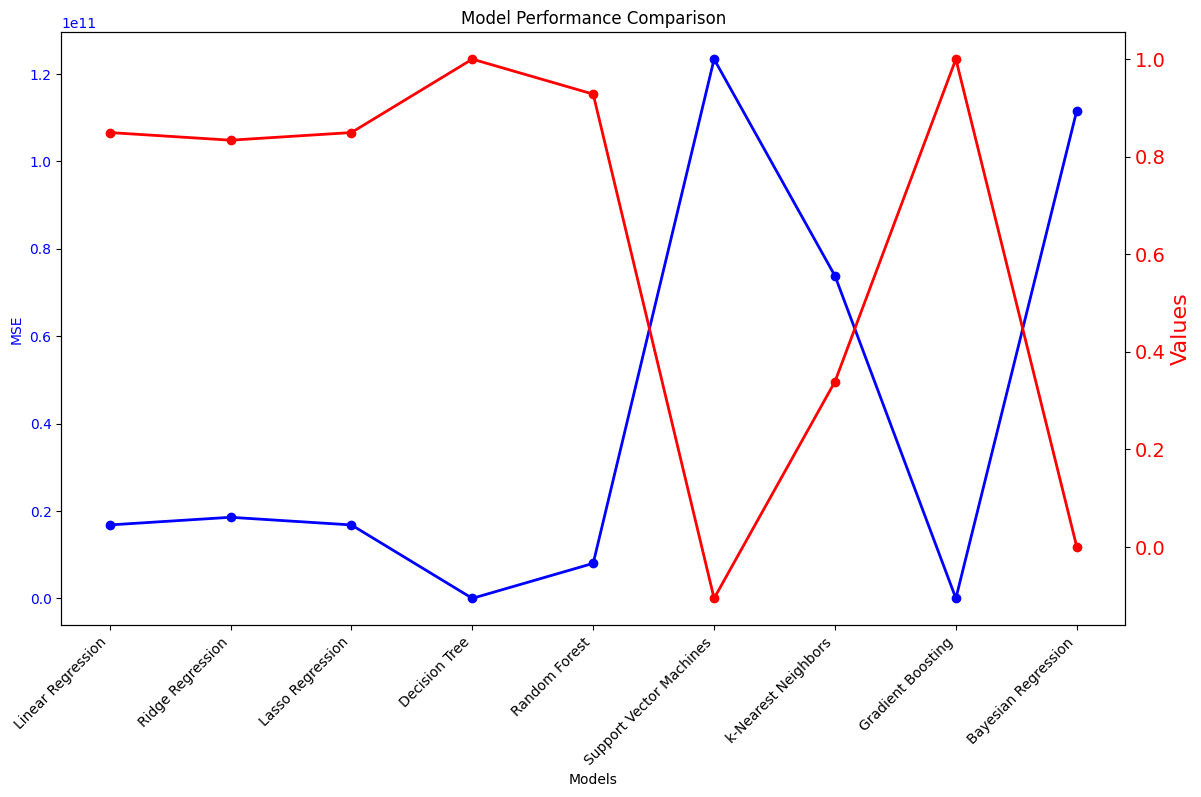

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay

import pandas as pd

# Creating the DataFrame from the data calculated above
data = {
    'Models': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree',
               'Random Forest', 'Support Vector Machines', 'k-Nearest Neighbors',
               'Gradient Boosting', 'Bayesian Regression'],
    'MSE': [16802972596.7, 18555397167.2, 16802972597.0, 0,
            8011076053.94, 123412975423.35, 73801842659.1,
            88.9121599953, 111626509921.45],
    'R2 Score': [0.8494714866, 0.8337724867, 0.8494714866, 1,
                 0.9282332122, -0.105588408, 0.3388502185,
                 1, 2.66E-10]
}

df = pd.DataFrame(data)

# Plotting the line charts for MSE and R2 Score
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot MSE
ax1.plot(df['Models'], df['MSE'], color='b', marker='o', linestyle='-', linewidth=2, label='MSE')
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(df['Models'], rotation=45, ha='right')

# Create a secondary y-axis for R2 Score
ax2 = ax1.twinx()
ax2.plot(df['Models'], df['R2 Score'], color='r', marker='o', linestyle='-', linewidth=2, label='R2 Score')
ax2.set_ylabel('R2 Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

fig.tight_layout()
plt.title('Sample Bar Plot', fontsize=20)
plt.xlabel('Category', fontsize=40)
plt.ylabel('Values', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Model Performance Comparison')
plt.show()
